In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To display plots inline (if using Jupyter)
%matplotlib inline

# Optional: configure plots
sns.set(style='whitegrid', palette='muted')


In [2]:
df = pd.read_csv('netflix_dataset.csv')
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# Check dataset info
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [6]:
df['Director'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)
df['Rating'].fillna('Not Rated', inplace=True)

/tmp/ipykernel_7746/738476124.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Director'].fillna('Unknown', inplace=True)
/tmp/ipykernel_7746/738476124.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [10]:
df.Country.unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland, United States', 'Thailand', 'Nigeria',
       'Unknown', 'Norway, Iceland, United States', 'United Kingdom',
       'Japan', 'South Korea', 'Italy', 'Canada', 'Indonesia', 'Romania',
       'Spain', 'Iceland', 'South Africa, Nigeria', 'France',
       'United States, South Africa', 'Portugal, Spain',
       'Hong Kong, China, Singapore', 'United States, Germany',
       'South Africa, China, United States', 'Argentina',
       'United States, France, Serbia', 'Germany',
       'Denmark, France, Poland', 'Poland', 'Kenya',
       'New Zealand, United Kingdom', 'Pakistan', 'Australia',
       'Australia, United States', 'Mexico, United States',
       'United States, China', 'China, Hong Kong', 'Taiwan',
       'United States, United Kingdom', 'France, South Korea, Japan',
       'United States, Canada', 'United Kingdom, United States',
       'Netherlands, Denmark, South Africa', 'Canada

In [11]:
# Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract Year
df['Year'] = df['Release_Date'].dt.year


In [12]:
# Separate numeric value and unit for Duration
df['Duration_Number'] = df['Duration'].str.extract('(\d+)').astype(float)
df['Duration_Unit'] = df['Duration'].str.extract('([a-zA-Z]+)')

# Preview
df[['Duration', 'Duration_Number', 'Duration_Unit']].head()


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_7746/2664260201.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['Duration_Number'] = df['Duration'].str.extract('(\d+)').astype(float)


,Duration,Duration_Number,Duration_Unit
0,4 Seasons,4.0,Seasons
1,93 min,93.0,min
2,78 min,78.0,min
3,80 min,80.0,min
4,123 min,123.0,min


Category
Movie      5379
TV Show    2410
Name: count, dtype: int64


/tmp/ipykernel_7746/3771747013.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='Set2')


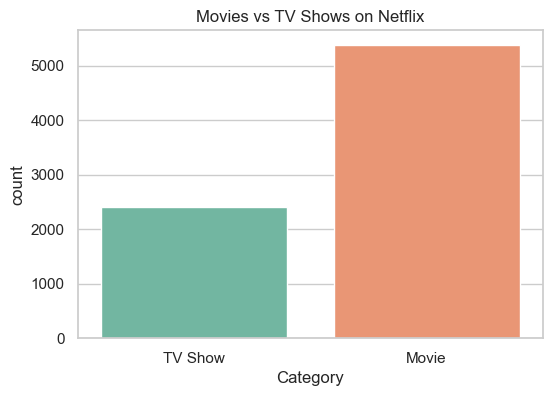

In [13]:
# Count Movies vs TV Shows
category_counts = df['Category'].value_counts()
print(category_counts)

# Plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Category', palette='Set2')
plt.title('Movies vs TV Shows on Netflix')
plt.show()


/tmp/ipykernel_7746/3758918555.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')


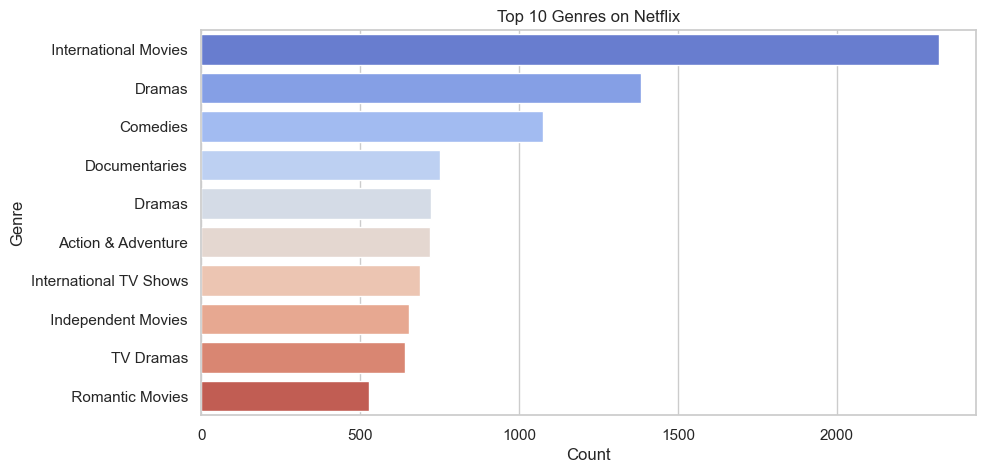

In [14]:
# Some shows have multiple genres separated by comma, split them
all_genres = df['Type'].dropna().str.split(',', expand=True).stack()
top_genres = all_genres.value_counts().head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


/tmp/ipykernel_7746/3471283842.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


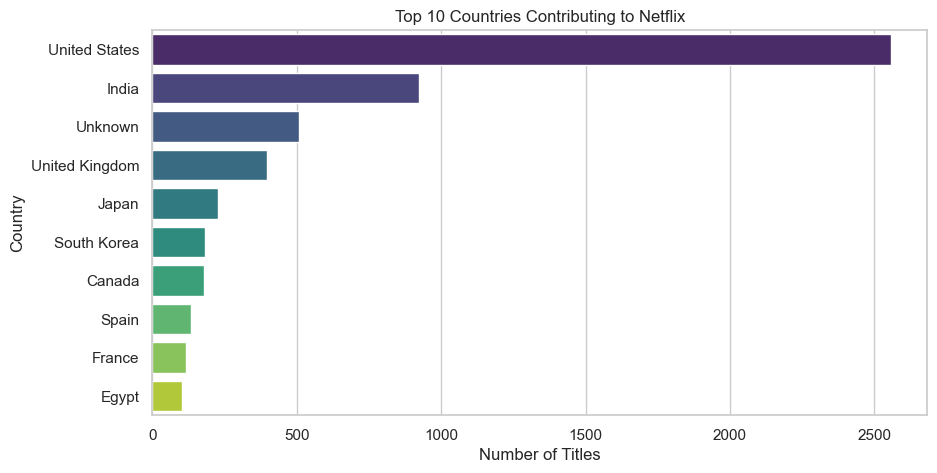

In [15]:
top_countries = df['Country'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries Contributing to Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


/tmp/ipykernel_7746/2435069088.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Rating', order=df['Rating'].value_counts().index, palette='magma')


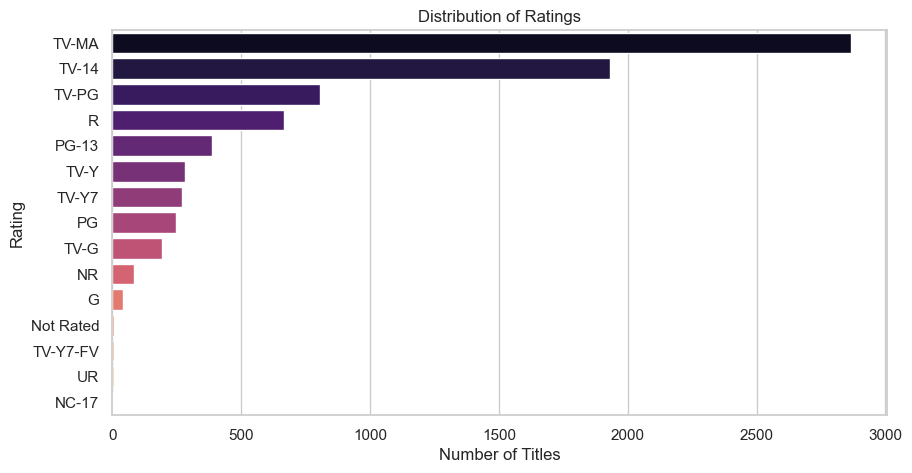

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='Rating', order=df['Rating'].value_counts().index, palette='magma')
plt.title('Distribution of Ratings')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.show()
